# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
# Your work here.

In [3]:
# import other packages
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# seed the pseudorandom number generator
np.random.seed(42)

## Normal Distribution

The probability density function of the normal distribution with mean $\mu$ and variance $\sigma^2$ is given by

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [5]:
# define a function for the pdf of a normal distribution
def norm_pdf(x,mu,sigma2):
    """This function computes the pdf value f(x) for a 
    normal distribution with mean mu and variance sigma2.
    It takes an array_like x, and scalar mu and sigma2 as input."""
    denom = np.sqrt(2 * np.pi * sigma2)
    exponent = -(x - mu)**2 / (2 * sigma2)
    f = np.exp(exponent) / denom
    
    return f

In [6]:
# define a function to calculate a bootstrap sample
def bs_sample(data):
    """this function takes an array of data and returns
    a bootstrap sample"""
    
    # evaluate and return the bootstrap sample
    sample = np.random.choice(data, size=len(data))
    return sample

# define a function to calculate bootstrap replicates
def bs_reps(data, func, n_reps):
    """This function takes an array of data, a function,
    and an integer as input.  n_reps bootstrap samples
    are created from the data, and replicates are evaluated
    from the samples using the function func.
    NOTE: This function depends on the 
        user defined function bs_sample()!!!"""
    
    # initialize an array of replicates
    reps = np.empty(n_reps)
    
    # create a for loop
    for i in range(n_reps):
        # create a bootstrap sample
        sample = bs_sample(data)
        
        # evaluate the bootstrap replicate
        reps[i] = func(sample)
    
    # return the array of bootstrap replicates
    return reps

## Task 1

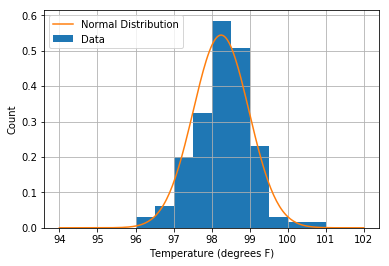

In [7]:
# hard code the bin edges and centers.
bin_edges = np.linspace(96, 101, (101-96)*2 + 1)

# plot a normalized histogram of temperatures. 
df.temperature.hist(bins=bin_edges, normed=True, label='Data')   

# find the mean and sample variance of the dataset
mean_t = np.mean(df.temperature)
var_t = np.var(df.temperature, ddof=1)

# plot the normal curve using the optimal parameters from the dataset
x = np.linspace(int(df.temperature.min() - 2),int(df.temperature.max() + 2),200)
y = norm_pdf(x, mean_t, var_t)
plt.plot(x,y, label='Normal Distribution')

# configure and show the plot
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Count')
plt.legend()
plt.show()

The temperature data appears to be normally distributed.  The theoretical pdf for the normal distrubution using the optimal parameters from the dataset resembles the shape of the histogram of the data.

A $\chi^2$ Goodness-of-Fit Test is performed on the data to determine if the temperature population distribution is normal.  

The null and alternative hypotheses are:

>H$_0$: The distribution of body temperatures is normal.  
>H$_1$: The distribution of body temperatures is not normal.

A significance level of $\alpha=0.05$ is chosen for this test. 

The data is separated into 10 bins by first separating the z-distribution into 10 regions of equal area, and then by transforming the corresponding z values to obtain the bins for the temperatures.  Each bin is expected to contain 13 data points.  

The $\chi^2$ value is evaluated by the following expression
\begin{align}
\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}
\end{align}
where n is the number of bins, $O_i$ is the obeserved count for bin $i$, and $E_i$ is the expected count for bin $i$.

The degrees of freedom are given by $n - k - 1$ where $n$ is the number of bins and $k$ is the number of parameters. In this case, there are 10 bins and 2 parameters, resulting in 7 degrees of freedom.

In [8]:
# set the 10, 20, ... , 90 percentiles of the z-distribution
# NOTE:  I could not get scipy.stats to import!!!  Hard code the values.
z_bin_edges = np.array([-1.28, -0.84, -0.52, -0.25, 0, 
               0.25, 0.52, 0.84, 1.28])

# set the bin edges for the temperatures
x_bin_edges_mid = z_bin_edges * np.sqrt(var_t) + mean_t
x_bin_edges = np.concatenate((np.array([df.temperature.min() - 1]),
                              x_bin_edges_mid,
                             np.array([df.temperature.max() + 1])))

In [9]:
# get the obeserved count for each bin
obs = df.groupby(pd.cut(df.temperature, x_bin_edges, right=False, labels=False))['temperature'].count()

# get the expected count for each bin
exp = np.ones(10) * len(df.temperature) / 10

In [10]:
# calculcate the chi-squared statistic
chi2 = np.sum((obs - exp)**2 / exp)
print('Chi-Squared value =' ,chi2)

Chi-Squared value = 4.76923076923


The critical $\chi^2$ value for 7 degrees of freedom with $\alpha=0.05$ is listed as 14.067 in a lookup table.  The observed value is far below this critical value, and so the p-value for the test statistic is greater than 5%, and we are unable to reject the null hypothesis.  

This test result suggests that the temperatures are normally distributed.

## Task 2

In [11]:
# determine the number of data points
print('Temperature sample size =',df.temperature.count())

Temperature sample size = 130


The temperature dataset contains 130 data points.  Typically, the Central Limit Theorem holds for sample sizes $\ge$ 30, and so **this sample size is sufficiently large**.  

**We will consider the temperatures as independent for the sake of this assignment**.  One subject's temperature should not influence any other subject's temperature.  If a more rigorous analysis is desired, one should review the data collection methods to determine if the data points are truly independent.  For example, it's possible that some test subjects were grouped together in small waiting rooms prior to the measurements, meaning their temperatures would affect the ambient temperature and therefore the temperature of the other test subjects in the room.  

**We also assume the data was randomly sampled, for the sake of this assignment.**

## Task 3

The hypothesis tests in this section are peformed to evaulate whether the true population mean temperature is different from 98.6 degrees F, using a significance level of $\alpha = 0.05$.  The null and alternative hypotheses are:

>H$_0$: $\mu = 98.6$ degrees F  
>H$_1$: $\mu \neq 98.6$ degrees F

where $\mu$ is the true population mean.  The hypothesis tests are two-tailed tests, because they test whether the mean population temperature is different from 98.6 degrees F rather than testing if it is strictly above or below this value.  

### Bootstrap Hypothesis Test

In [12]:
# shift the temperature distribution so that its mean is 98.6 deg F.
shifted_t = df.temperature - mean_t + 98.6

# create 10000 bootstrap replicates of the mean shifted temperature
t_bs_reps = bs_reps(shifted_t, np.mean, 10000)

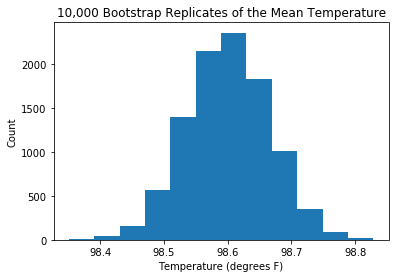

In [13]:
# plot a histogram of the bootstrap replicates
plt.hist(t_bs_reps, bins=12)
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Count')
plt.title('10,000 Bootstrap Replicates of the Mean Temperature')
plt.show()

In [14]:
# evaluate the p-value
p_val = np.sum(abs(t_bs_reps - 98.6) >= abs(mean_t - 98.6)) / len(t_bs_reps)
print('p-value =', p_val)

p-value = 0.0


A bootstrap hypothesis test was performed by shifting the distribution of temperature values such that the mean changed to 98.6 degrees F, to be consistent with the null hypothesis, then generating 10,000 bootstrap replicates of the mean temperature from the shifted dataset.  The p-value of 0 indicates that none of the 10,000 replicates had a value at least as extreme as the original dataset's mean.  This indicates that, assuming the null hypothesis is true, there is less than a 0.01% likelihood of obtaining a value as extreme or greater than the mean temperature in the dataset by chance.  

The null hypothesis is rejected, and the alternative hypothesis is accepted.  **This bootstrap hypothesis test indicates that the mean population temperature is different from 98.6 degrees F.**

### $z$-test

It is most appropriate to use a $z$-statistic for this task.  Although the true population variance is unknown, the sample size is sufficiently large ($\ge 30$) to assume the sampling distribution of the sample mean is normally distributed.

Assuming the null hypthesis, the sampling distribution of the sample mean has a mean $\mu_{\bar{x}}$ of 98.6 degrees F.  The standard error of the mean, $\sigma_{\bar{x}}$, is estimated as $\frac{s}{\sqrt{n}}$, where $s$ is the sample standard deviation and $n$ is the number of data points in the sample.

The $z$-score of a mean temperature is given by

\begin{align}
z(\bar{x}) = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma_{\bar{x}}}
\end{align}

In [15]:
# evaluate the z score of the sample mean
z = (mean_t - 98.6) / (np.sqrt(var_t)/np.sqrt(len(df.temperature)))

#print the results
print('z-score =', z)

z-score = -5.45482329236


The $z$-score of the observed sample mean is $-5.45$.  The lower critical $z$-score for a two-tailed test with significance level $\alpha=0.05$ is -1.96.  The observed value is below this critical value, so the null hypothesis is rejected and the alternative hypothesis is accepted.  

**This test indicates that the population mean temperature is different from 98.6 degrees F.**



### $t$-test

A $t$-statistic is used for this hypothesis test, although a $z$-statistic is more appropriate.  This $t$-test may produce a different $p$-value because the Student's $t$-distribution has a different shape than the standard normal distribution.  Each of the two test statistics have the same observed value, but the associated $p$-value should be higher for the $t$-distribution than for the standard normal distribution.  In this case, with 130 data points, the difference between the two $p$-values should be small.  

Assuming the null hypothesis, the sampling distribution of the sample mean has a mean $\mu_{\bar{x}}$ of 98.6 degrees F.  The standard error of the mean, $\sigma_{\bar{x}}$, is estimated as $\frac{s}{\sqrt{n}}$, where $s$ is the sample standard deviation and $n$ is the number of data points in the sample.

The $t$-score of a mean temperature is given by

\begin{align}
t(\bar{x}) = \frac{\bar{x} - \mu_{\bar{x}}}{\sigma_{\bar{x}}}
\end{align}

The degrees of freedom are given by $n$ - 1, where $n$ is the number of data points in the sample.  In this case, there are 129 degrees of freedom.  

The $t$-score of the observed sample mean is $-5.45$.  It has the same value as the $z$-score evaluated in the previous section.  The lower critical $t$-score for a two-tailed test with significance level $\alpha=0.05$ and 129 degrees of freedom is approximately -1.98.  The observed value is below this critical value, so the null hypothesis is rejected and the alternative hypothesis is accepted.

**This test indicates that the population mean temperature is different from 98.6 degrees F.**

## Task 4

The $t$-test and $z$-test are repeated for a sample of size 10, drawn at random with replacement from the dataset.  Once again, a significance level of $\alpha=0.05$ is used.  This time, there are 9 degrees of freedom because the sample has 10 data points. The null and alternative hypotheses are:

>H$_0$: $\mu = 98.6$ degrees F  
>H$_1$: $\mu \neq 98.6$ degrees F

In [16]:
# draw a random sample of size 10 from the dataset
t_10 = np.random.choice(df.temperature,size=10)

#calculate the mean and sample variance
m_10 = np.mean(t_10)
var_10 = np.var(t_10, ddof=1)

In [17]:
# evaluate the z-score.  The t-score also has this value.
zt_10 = (m_10 - 98.6) / (np.sqrt(var_10 / len(t_10)))
print('The observed z-score (or t-score) = ', zt_10)

The observed z-score (or t-score) =  2.2948907108


The observed $z$-score, or equivalently the observed $t$-score, is 2.29.  The upper critical $z$-score is once again 1.96.  The observed $z$-score is above this critical value, so the null hypothesis is rejected and the alternative hypothesis is accepted.  

The upper critical $t$-score is now 2.262, because the degrees of freedom have changed from 129 to 9.  The observed $t$-score is above this critical value, so the null hypothesis is rejected and the alternative hypothesis is accepted.  

**Both tests indicate that the population mean temperature is different from 98.6 degrees F.**  The $t$-test is more appropriate in this case, because the sample size is small ($\lt 30$), and the population variance is unknown. The sampling distribution of the sample mean does not approximate a normal distribution well for samples of size 10.

**It is worth noting that the $t$-score is very close to the critical value.  Furthermore, a significance level of $0.01$ would have resulted in different conclusions.**  This alternative threshold has an associated critical $t$-value of 3.250, and a critical $z$-value of 2.567. **The tests would have indicated that the mean temperature is not different from 98.6 degrees F, if they had used a significance level of $\alpha=0.01$.**


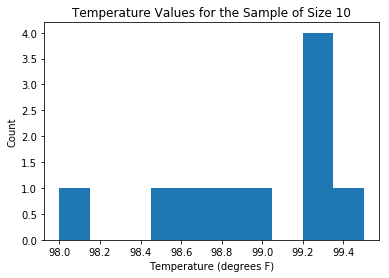

In [18]:
# histogram of the sample.
plt.hist(t_10)
plt.xlabel('Temperature (degrees F)')
plt.ylabel('Count')
plt.title('Temperature Values for the Sample of Size 10')
plt.show()

## Task 5

In this section, 99% confidence intervals are evaluated using three different methods.  The Margin of Error in each case is half of the range of the associated confidence interval.  

### Bootstrap

In [19]:
# create 10,000 bootstrap replicates of the mean
t_bs_reps_task5 = bs_reps(df.temperature, np.mean, 10000)

# evaluate the 99 % confidence interval
bs_reps_99ci = np.percentile(t_bs_reps_task5, [0.5, 99.5])

# calculate the margin of error
bs_me = (bs_reps_99ci[1] - bs_reps_99ci[0]) / 2

print('The 99% confidence interval is (', bs_reps_99ci[0], ', ', bs_reps_99ci[1], ')')
print('The margin of error is', bs_me)

The 99% confidence interval is ( 98.0853846154 ,  98.4169230769 )
The margin of error is 0.165769230769


### $t$-statistic

In [20]:
# evaluate the critical t-score for a 99% confidence interval.
#NOTE: I could not find a table with exactly 129 degrees of freedom.
#      I am approximating a value between 100 and 1000 d.o.f.
t_crit = 2.6

# evaluate the 99 % confidence interval
t_crits = np.array([-t_crit, t_crit])
ci_t = t_crits * np.sqrt(var_t/len(df.temperature)) + mean_t

# calculate the margin of error
me_t = (ci_t[1] - ci_t[0]) / 2

print('The 99% confidence interval is (', ci_t[0], ', ', ci_t[1], ')')
print('The margin of error is', me_t)

The 99% confidence interval is ( 98.0820392855 ,  98.416422253 )
The margin of error is 0.167191483779


### $z$-statistic

In [21]:
# evaluate the critical z-score for a 99% confidence interval.
z_crit = 2.576

# evaluate the 99 % confidence interval
z_crits = np.array([-z_crit, z_crit])
ci_z = z_crits * np.sqrt(var_t/len(df.temperature)) + mean_t

# calculate the margin of error
me_z = (ci_z[1] - ci_z[0]) / 2

print('The 99% confidence interval is (', ci_z[0], ', ', ci_z[1], ')')
print('The margin of error is', me_z)

The 99% confidence interval is ( 98.0835825915 ,  98.414878947 )
The margin of error is 0.165648177774


All three methods produce similar results for the 99% confidence interval and the margin of error of the mean temperature.  **These approaches indicate that a temperature below roughly 98.1 degrees F or above roughly 98.4 degrees F is abnormal.**

These approaches indicate the spread of the sampling distribution of the sample mean, rather than the spread of the population temperature distribution.  It is possible to calculate the 0.5th and 99.5th percentiles of the dataset in order to quantify the spread.  It is also possible to model the data with a theoretical normal distribution, and then determine the bounds that contain 99% of the area of the theoretical probability density function.  These techniques will not be performed in this assignment.

## Task 6

In [22]:
# separate the temperatures by gender
t_m = df.temperature[df.gender == 'M']
t_f = df.temperature[df.gender == 'F']

print('n_male = ', t_m.size, ', n_female = ', t_f.size)

n_male =  65 , n_female =  65


A two sample $z$-test is performed to determine whether males and females have different normal body temperatures.  There are 65 data points for each gender, so the sample size is sufficiently large $( \ge 30)$ to use the $z$-score as the test statistic.  In this case, the test will determine whether there is a significant difference between the mean temperatures. The test is performed with a significance level of $\alpha=0.05$.  The null and alternative hyptheses are:

>H$_0$: $\mu_M = \mu_F $  
>H$_1$: $\mu_M \neq \mu_F $

where $\mu_M$ and $\mu_F $ are the population mean temperatures for males and females, respectively.  

Assuming the null hypthesis, the sampling distribution of the difference between the sample means is modeled as a normal distribution with the mean centered at 0 degrees F.  The variance is estimated as $\frac{s_M^2 + s_F^2}{65}$, where $s_M^2$ and $s_F^2$ are the sample variances for males and females, respectively. 

In [23]:
print('sample mean temperature for males is', np.mean(t_m), 'degrees F')
print('sample mean temperature for females is', np.mean(t_f), 'degrees F')

sample mean temperature for males is 98.1046153846 degrees F
sample mean temperature for females is 98.3938461538 degrees F


In [24]:
# evaluate the difference of means
mean_MmF = np.mean(t_m) - np.mean(t_f)

# evaluate the sum of sample variances
var_MmF = np.var(t_m, ddof=1) + np.var(t_f, ddof=1)

# evaluate the z score
z_MmF = (mean_MmF - 0) / np.sqrt(var_MmF / 65)

print('The observed z-score is', z_MmF)

The observed z-score is -2.28543453817


The observed $z$-score of -2.285 has an associated $p$-value of 0.00219.  This $p$-value is below the threshold of $0.05$, meaning there is less than a 5% chance of sampling the observed value assuming the null hypothesis is true.  The null hypothesis is rejected, and the alternative hypothesis is accepted.

**This test indicates that there is a significant difference between the mean temperatures for males and females.**

Alternative tests could be performed to compare the distributions of temperatures between males and females.  A permutation test could determine whether the groups have similar distributions.  A bootstrap hypothesis test could determine whether there is a significant difference between the means of the distributions.  These tests will not be performed in this assignment.

### Conclusion

The tests performed in this assignment suggest that, based on the dataset, the mean normal body temperature is different from 98.6 degrees F.  In Task 3, three different hypothesis tests indicated this result.  In Task 5, confidence intervals constructed using three different methods indicated that mean temperatures above roughly 98.4 degrees F are abnormal. On a separate note, the test in Task 6 indicated that males and females have different mean normal body temperatures.  

Task 4 showed interesting results compared to the other sections.  Two hypothesis tests were performed in Task 4, and the results supported the hypothesis that the mean normal body temperature is different from 98.6 degrees F.  The tests may have had different results if a different significance level was used.  It is recommended that more experiments are conducted to further examine the distribution of the normal body temperature.  Further research should take care to control the conditions of the data collection.  